In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("Student_performance_data _.csv")
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
df.isna().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
df['GradeClass'].nunique()

5

In [ ]:
grade_class_distribution = df['GradeClass'].value_counts(normalize=True)*100
grade_class_distribution

,proportion
GradeClass,
4.0,50.627090
3.0,17.307692
2.0,16.346154
1.0,11.245819
0.0,4.473244


In [ ]:
df.drop(['StudentID'], axis=1, inplace=True)

In [ ]:
df.describe()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

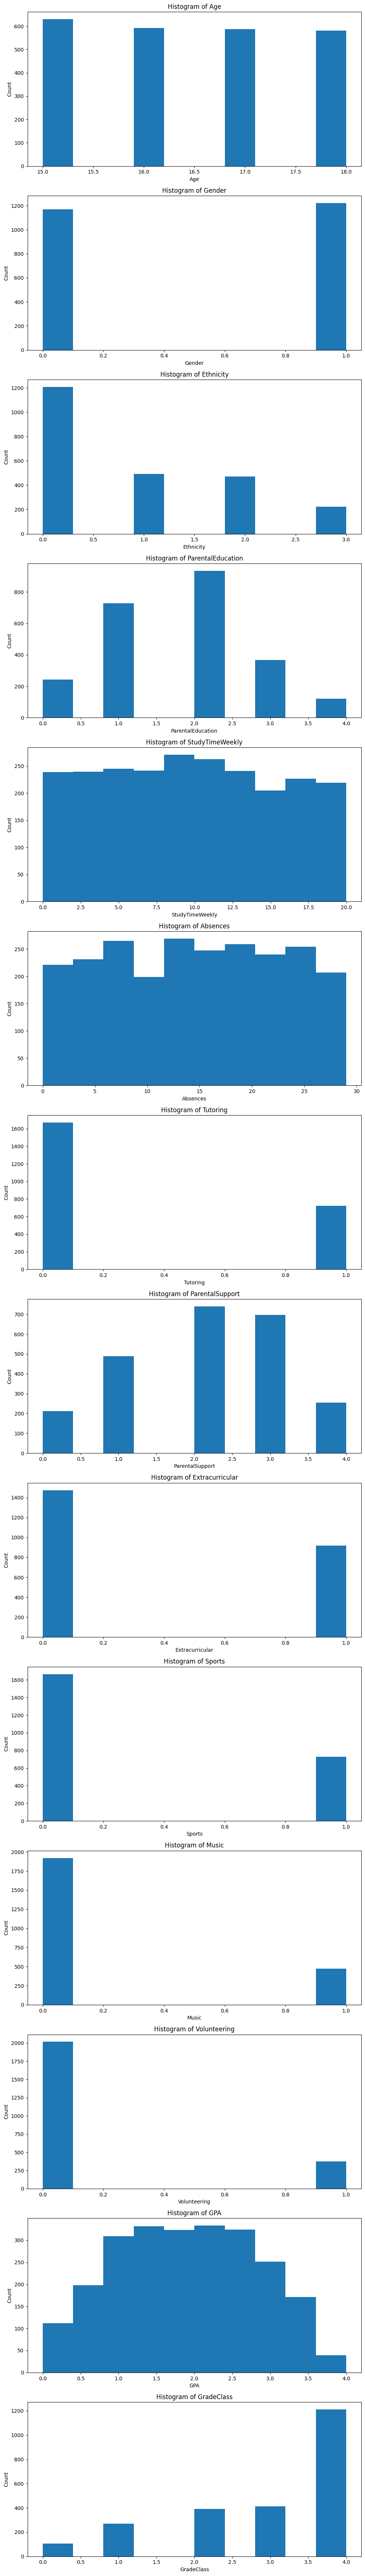

In [ ]:
no_columns = len(df.columns[:14])
plt.figure(figsize=(10, 5 * no_columns))

for i, column in enumerate(df.columns[:14]):
  plt.subplot(no_columns, 1, i+1)
  plt.hist(df[column])
  plt.title(f"Histogram of {column}")
  plt.xlabel(f"{column}")
  plt.ylabel("Count")

plt.tight_layout()
plt.show()

A number of the attributes in the dataset could need additional attention:


1. Zero values in health-related columns:

Since these metrics normally shouldn't be 0, the zero values in columns like Blood Pressure, Skin Thickness, Insulin, BMI, and Glucose are probably invalid.

Treatment: Use imputation techniques (such as mean or median imputation) to fill in the missing values after replacing zero values with NaN.

2. Pregnancy:

The number of pregnancies is represented by the Pregnancies column, which is a count characteristic. This count may need to be categorised (e.g., into ranges) for various studies in order to provide more insightful information.

Treatment: For some models, this property may be easier to grasp by binning or forming category groups.

3. Function of the Diabetes Pedigree:

Given its continuous nature, this trait, which is related to genetic factors, may benefit from normalisation or scaling.

Treatment: Standardization or normalization can improve model performance if this attribute is used in machine learning models.

In [ ]:
corr_matrix = df.corr(method='pearson')['GradeClass'].sort_values(ascending=False)
corr_matrix

,GradeClass
GradeClass,1.000000
Absences,0.728633
ParentalEducation,0.041031
Gender,0.022998
Volunteering,0.013156
Age,-0.006250
Ethnicity,-0.023326
Sports,-0.026654
Music,-0.036065
Extracurricular,-0.069733


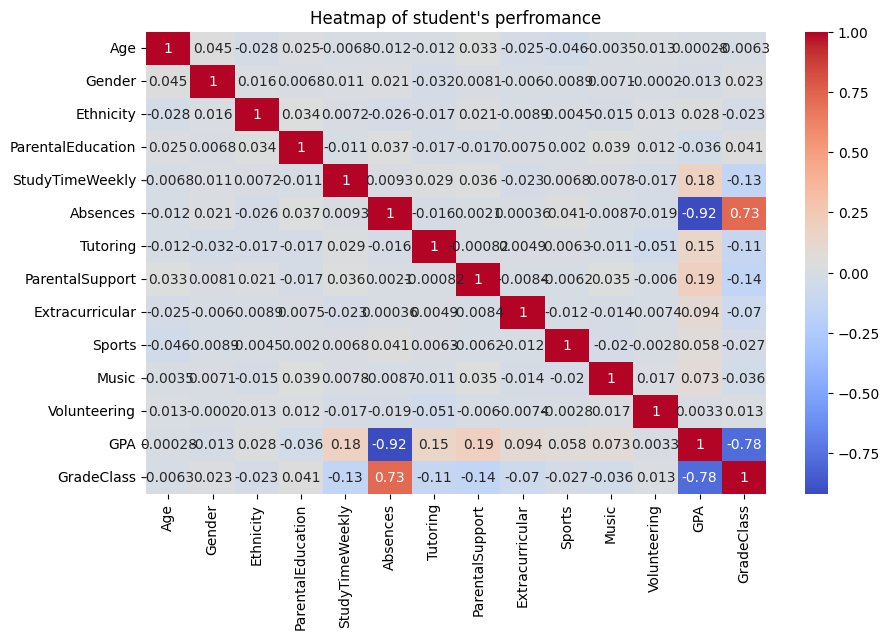

In [ ]:
corr_matrix = df.corr(method='pearson')

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of student's perfromance")
plt.show()

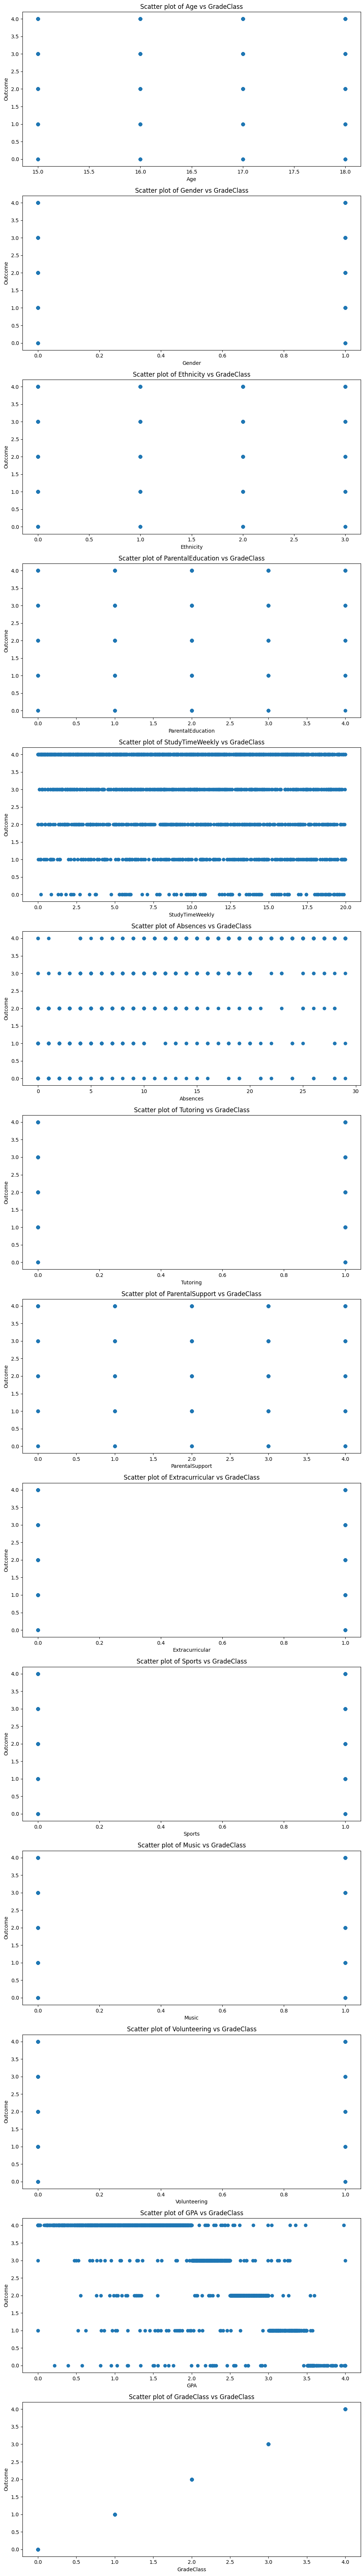

In [ ]:
no_columns = len(df.columns[:14])
plt.figure(figsize=(10, 5 * no_columns))

for i, attribute in enumerate(df.columns[:14]):
  plt.subplot(no_columns, 1, i+1)
  plt.scatter(df[attribute], df['GradeClass'])
  plt.title(f"Scatter plot of {attribute} vs GradeClass")
  plt.xlabel(f"{attribute}")
  plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

Key Observations

Strongest Correlations with GradeClass:

Absences (0.73):

A positive correlation indicates that higher absences are strongly associated with lower grades. This relationship suggests that attendance is crucial for maintaining good academic performance, as missing classes likely impacts students' understanding of material and overall engagement.

GPA (-0.78):

The strong negative correlation with GradeClass aligns well with expectations since GPA is a measure of academic performance. Higher GPAs are associated with higher grades (lower numeric values for GradeClass). GPA is, unsurprisingly, a powerful predictor of GradeClass.



Moderate Correlations:

ParentalSupport (-0.14):
Moderate negative correlation suggests that higher parental support slightly correlates with better grades. Parental support may contribute to students' motivation, resilience, and possibly provide them with resources to succeed academically.

StudyTimeWeekly (-0.13):

The amount of weekly study time also shows a modest negative correlation with GradeClass, implying that students who dedicate more time to studying tend to have better grades. However, this relationship is weaker, possibly due to individual differences in study effectiveness and other external factors.

Tutoring (-0.11):

Negative correlation here implies that students who receive tutoring may perform slightly better. While tutoring is often aimed at students who need extra help, it likely aids in grade improvement.
Weaker or Negligible Correlations:

Variables such as ParentalEducation, Gender, Volunteering, and Age show very low or negligible correlations with GradeClass. This finding suggests that while these factors contribute to a student’s overall profile, they don’t play significant roles in directly predicting grade outcomes in this dataset.

Extracurricular Activities, Sports, and Music Participation: Weak correlations may indicate that these activities don’t significantly impact grades in a direct way. However, they could contribute to other areas of student development not captured by GradeClass.

In [ ]:
df.drop(['ParentalEducation', 'Gender', 'Volunteering', 'Age', 'Extracurricular', 'Sports', 'Music'], axis=1, inplace =True)

In [ ]:
df.drop(['Ethnicity'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
scaled_data = ss.fit_transform(df[['StudyTimeWeekly', 'Absences', 'GPA']])
scaled_data

array([[ 1.78033552, -0.89082237,  1.11808631],
       [ 0.99737625, -1.71769358,  1.24237446],
       [-0.98404514,  1.35354235, -1.96027719],
       ...,
       [-0.52489493,  0.64479559, -0.83484487],
       [ 0.46794965,  0.29042222, -0.11245195],
       [ 1.42400846, -0.18207562,  0.25555918]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, columns=['StudyTimeWeekly', 'Absences', 'GPA'])
ordinal_data = df[['Tutoring', 'ParentalSupport', 'GradeClass']]
data1 = pd.concat([scaled_data_df, ordinal_data.reset_index(drop=True)], axis=1)
data1

,StudyTimeWeekly,Absences,GPA,Tutoring,ParentalSupport,GradeClass
0,1.780336,-0.890822,1.118086,1,2,2.0
1,0.997376,-1.717694,1.242374,0,1,1.0
2,-0.984045,1.353542,-1.960277,0,2,4.0
3,0.045445,-0.063951,0.161790,0,3,3.0
4,-0.902311,0.290422,-0.675573,1,3,4.0
...,...,...,...,...,...,...
2387,0.160762,-1.481445,1.693315,0,4,0.0
2388,-0.387285,-1.245196,1.500565,1,4,4.0
2389,-0.524895,0.644796,-0.834845,0,2,2.0
2390,0.467950,0.290422,-0.112452,0,2,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X = data1[['StudyTimeWeekly', 'Absences', 'GPA', 'Tutoring', 'ParentalSupport']]
y = data1['GradeClass']


X.shape, y.shape

((2392, 5), (2392,))

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4, random_state = 42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, stratify = y_temp)

split_info = {
    "Training set size": len(X_train),
    "Testing set size": len(X_test),
    "Validation set size": len(X_val)
}

train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)
valid_distribution = y_val.value_counts(normalize=True)

split_info.update({
    "Training set distributuion": train_distribution.to_dict(),
    "Validation set distribution": test_distribution.to_dict(),
    "Testing set distribution": valid_distribution.to_dict()
})

dataframe = pd.DataFrame([split_info])
dataframe

,Training set size,Testing set size,Validation set size,Training set distributuion,Validation set distribution,Testing set distribution
0,1435,479,478,"{4.0: 0.5066202090592334, 3.0: 0.1728222996515...","{4.0: 0.5052192066805845, 3.0: 0.1732776617954...","{4.0: 0.5062761506276151, 3.0: 0.1736401673640..."


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)
X_test_poly = poly.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Best parameters: {'C': 100}


In [ ]:
model = LogisticRegression(multi_class='multinomial', C=100, solver='lbfgs', max_iter=500, random_state=42)

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['A','B','C','D','E'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['A','B','C','D','E'] )

print(validation_report, test_report)

              precision    recall  f1-score   support

           A       0.86      0.27      0.41        22
           B       0.76      0.72      0.74        53
           C       0.81      0.73      0.77        78
           D       0.70      0.72      0.71        83
           E       0.89      0.98      0.93       242

    accuracy                           0.83       478
   macro avg       0.80      0.68      0.71       478
weighted avg       0.83      0.83      0.82       478
               precision    recall  f1-score   support

           A       0.88      0.32      0.47        22
           B       0.76      0.83      0.79        53
           C       0.85      0.77      0.81        79
           D       0.78      0.75      0.77        83
           E       0.90      0.98      0.94       242

    accuracy                           0.86       479
   macro avg       0.83      0.73      0.75       479
weighted avg       0.85      0.86      0.85       479



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Axes: >

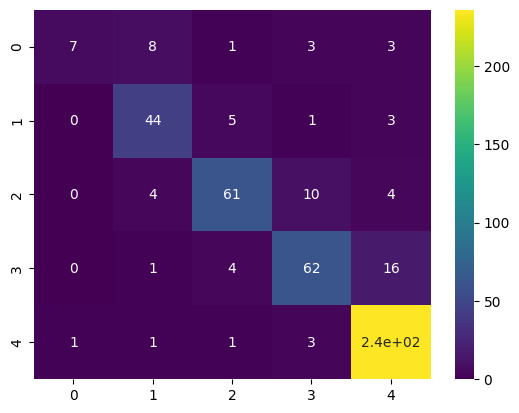

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data = cm)
sns.heatmap(cm_matrix, annot=True, cmap='viridis')

In [ ]:
from sklearn.svm import SVC

param_grid = {
    'kernel': ["linear", "rbf", "poly"],
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1]
    }
grid_search = GridSearchCV(SVC(degree=3, max_iter=500, random_state=42), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)

print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
from sklearn.svm import SVC

model = SVC(C=10, kernel='rbf', degree=3, gamma='scale', class_weight='balanced')

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['A', 'B', 'C', 'D', 'E'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['A', 'B', 'C', 'D', 'E'])

print(validation_report, test_report)

              precision    recall  f1-score   support

           A       0.44      0.50      0.47        22
           B       0.77      0.68      0.72        53
           C       0.87      0.85      0.86        78
           D       0.81      0.86      0.83        83
           E       0.93      0.93      0.93       242

    accuracy                           0.86       478
   macro avg       0.76      0.76      0.76       478
weighted avg       0.86      0.86      0.86       478
               precision    recall  f1-score   support

           A       0.41      0.55      0.47        22
           B       0.78      0.81      0.80        53
           C       0.91      0.76      0.83        79
           D       0.77      0.83      0.80        83
           E       0.92      0.91      0.91       242

    accuracy                           0.84       479
   macro avg       0.76      0.77      0.76       479
weighted avg       0.85      0.84      0.85       479



<Axes: >

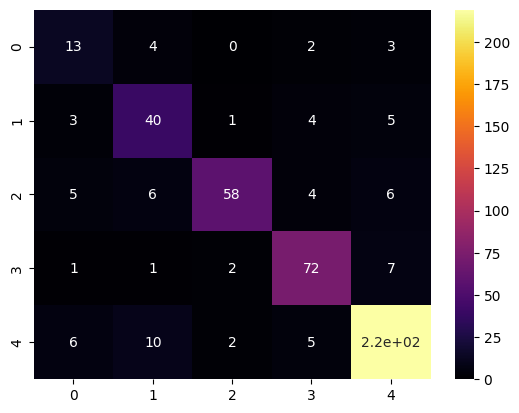

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data = cm)
sns.heatmap(cm_matrix, annot=True, cmap='inferno')

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_poly, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=2, min_samples_split=5, class_weight='balanced')

model.fit(X_train_poly, y_train)

y_val_pred = model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['A', 'B', 'C', 'D', 'E'])

y_test_pred = model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['A', 'B', 'C', 'D', 'E'])

print(validation_report, test_report)

              precision    recall  f1-score   support

           A       0.83      0.45      0.59        22
           B       0.90      0.85      0.87        53
           C       0.90      0.88      0.89        78
           D       0.86      0.84      0.85        83
           E       0.93      0.99      0.96       242

    accuracy                           0.91       478
   macro avg       0.88      0.80      0.83       478
weighted avg       0.90      0.91      0.90       478
               precision    recall  f1-score   support

           A       0.84      0.73      0.78        22
           B       0.90      0.81      0.85        53
           C       0.97      0.92      0.95        79
           D       0.93      0.93      0.93        83
           E       0.93      0.98      0.96       242

    accuracy                           0.93       479
   macro avg       0.91      0.87      0.89       479
weighted avg       0.93      0.93      0.93       479



<Axes: >

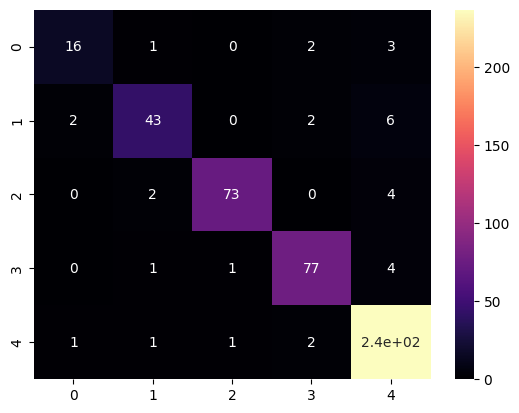

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm_matrix = pd.DataFrame(data = cm)
sns.heatmap(cm_matrix, annot=True, cmap='magma')

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
logistic_model = LogisticRegression(multi_class='multinomial', C=100, solver='lbfgs', max_iter=500, random_state=42)
svm_model = SVC(C=100, kernel='rbf', degree=3, gamma='scale', class_weight='balanced', probability = True)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_leaf=2, min_samples_split=5, class_weight='balanced')

ensemble_model = VotingClassifier(estimators=[
    ('logisitc_model', logistic_model),
    ('svm_model', svm_model),
    ('rf_model', rf_model)
], voting='soft')

ensemble_model.fit(X_train_poly, y_train)

y_val_pred = ensemble_model.predict(X_val_poly)
validation_report = classification_report(y_val, y_val_pred, target_names=['A', 'B', 'C', 'D', 'E'])

y_test_pred = ensemble_model.predict(X_test_poly)
test_report = classification_report(y_test, y_test_pred, target_names=['A', 'B', 'C', 'D', 'E'])

print("Validation Report:\n", validation_report)
print("Test Report:\n", test_report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Report:
               precision    recall  f1-score   support

           A       0.89      0.36      0.52        22
           B       0.84      0.81      0.83        53
           C       0.88      0.90      0.89        78
           D       0.86      0.82      0.84        83
           E       0.92      0.98      0.95       242

    accuracy                           0.89       478
   macro avg       0.88      0.78      0.80       478
weighted avg       0.89      0.89      0.89       478

Test Report:
               precision    recall  f1-score   support

           A       0.92      0.55      0.69        22
           B       0.84      0.81      0.83        53
           C       0.96      0.94      0.95        79
           D       0.93      0.89      0.91        83
           E       0.92      0.98      0.95       242

    accuracy                           0.92       479
   macro avg       0.91      0.83      0.86       479
weighted avg       0.92      0.92      0.92